In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import json
from wordcloud import WordCloud
#import necessory libraries to pre process the corpas of tags
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

## Read dataset & convert dataset into json to csv format

In [2]:
data=pd.read_json('complaints-2021-05-14_08_16_.json')
data.head()

,_index,_type,_id,_score,_source
0,complaint-public-v2,complaint,3211475,0,"{'tags': None, 'zip_code': '90301', 'complaint..."
1,complaint-public-v2,complaint,3229299,0,"{'tags': 'Servicemember', 'zip_code': '319XX',..."
2,complaint-public-v2,complaint,3199379,0,"{'tags': None, 'zip_code': '77069', 'complaint..."
3,complaint-public-v2,complaint,2673060,0,"{'tags': None, 'zip_code': '48066', 'complaint..."
4,complaint-public-v2,complaint,3203545,0,"{'tags': None, 'zip_code': '10473', 'complaint..."


In [3]:
# Load the JSON data
with open('complaints-2021-05-14_08_16_.json') as f:
    data = json.load(f)

# Extract the nested "_source" field from each record
source_data = [item["_source"] for item in data]

# Convert to DataFrame
df = pd.DataFrame(source_data)

# Display the DataFrame
print(df.head())

            tags zip_code complaint_id                               issue  \
0           None    90301      3211475   Attempts to collect debt not owed   
1  Servicemember    319XX      3229299     Written notification about debt   
2           None    77069      3199379  Other features, terms, or problems   
3           None    48066      2673060      Trouble during payment process   
4           None    10473      3203545                    Fees or interest   

               date_received state consumer_disputed  \
0  2019-04-13T12:00:00-05:00    CA               N/A   
1  2019-05-01T12:00:00-05:00    GA               N/A   
2  2019-04-02T12:00:00-05:00    TX               N/A   
3  2017-09-13T12:00:00-05:00    MI               N/A   
4  2019-04-05T12:00:00-05:00    NY               N/A   

                       product         company_response               company  \
0              Debt collection  Closed with explanation  JPMORGAN CHASE & CO.   
1              Debt collection  

In [4]:
# Convert date_received to datetime format for time-based analysis
df['date_received'] = pd.to_datetime(df['date_received'], errors='coerce')

In [5]:
df.head()

,tags,zip_code,complaint_id,issue,date_received,state,consumer_disputed,product,company_response,company,submitted_via,date_sent_to_company,company_public_response,sub_product,timely,complaint_what_happened,sub_issue,consumer_consent_provided
0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13 12:00:00-05:00,CA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,Servicemember,319XX,3229299,Written notification about debt,2019-05-01 12:00:00-05:00,GA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,None,77069,3199379,"Other features, terms, or problems",2019-04-02 12:00:00-05:00,TX,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
3,None,48066,2673060,Trouble during payment process,2017-09-13 12:00:00-05:00,MI,N/A,Mortgage,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,None,10473,3203545,Fees or interest,2019-04-05 12:00:00-05:00,NY,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A


In [6]:
# Set plot styles
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
plt.show()

<Figure size 1200x600 with 0 Axes>

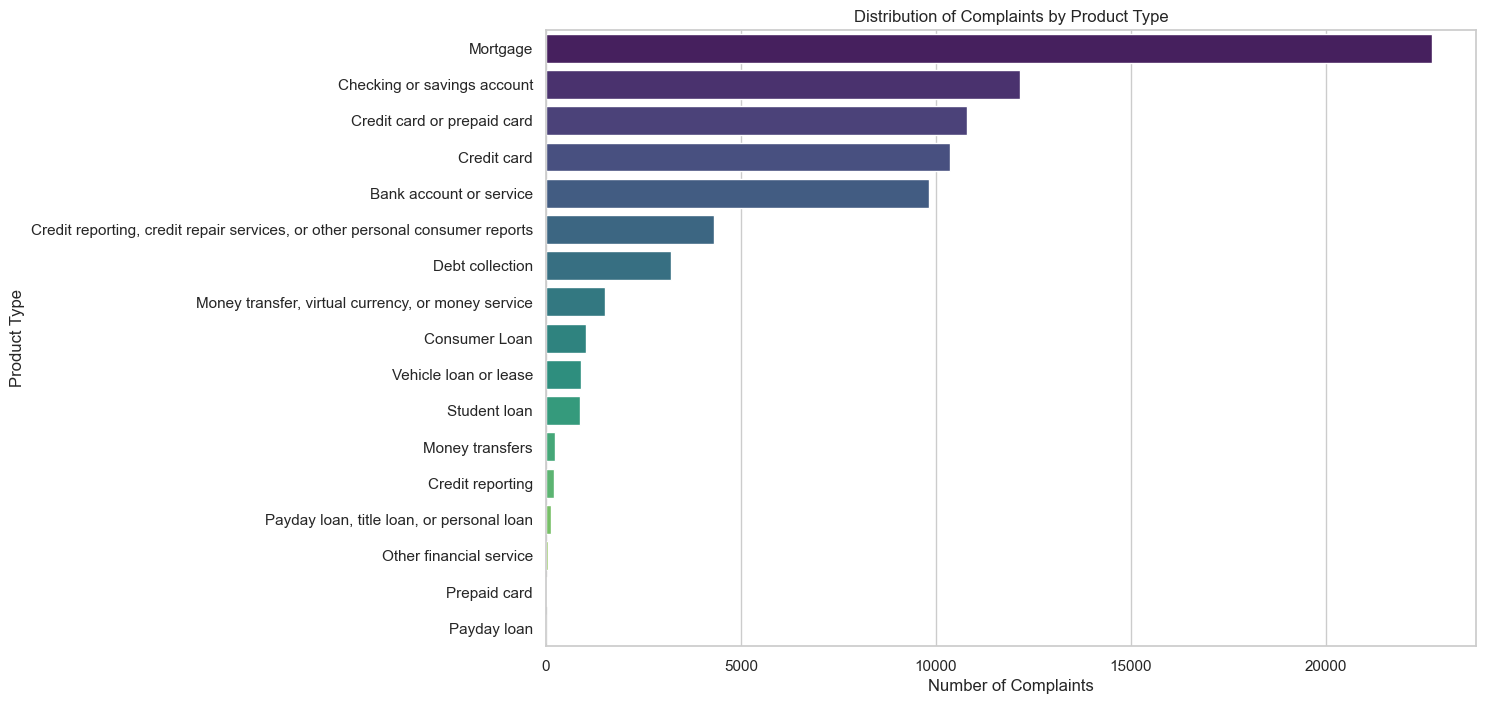

In [7]:
# 1. Distribution of Complaints by Product Type
plt.figure(figsize=(12, 8))
sns.countplot(y='product', data=df, order=df['product'].value_counts().index, palette="viridis")
plt.title("Distribution of Complaints by Product Type")
plt.xlabel("Number of Complaints")
plt.ylabel("Product Type")
plt.show()

- The chart displays the distribution of consumer complaints by product type.
- Mortgages, checking/savings accounts, and credit cards have the highest complaint volumes.
- Other significant areas include bank accounts, credit reporting, and debt collection.
- Highlights key areas in financial services where consumers commonly face issues.

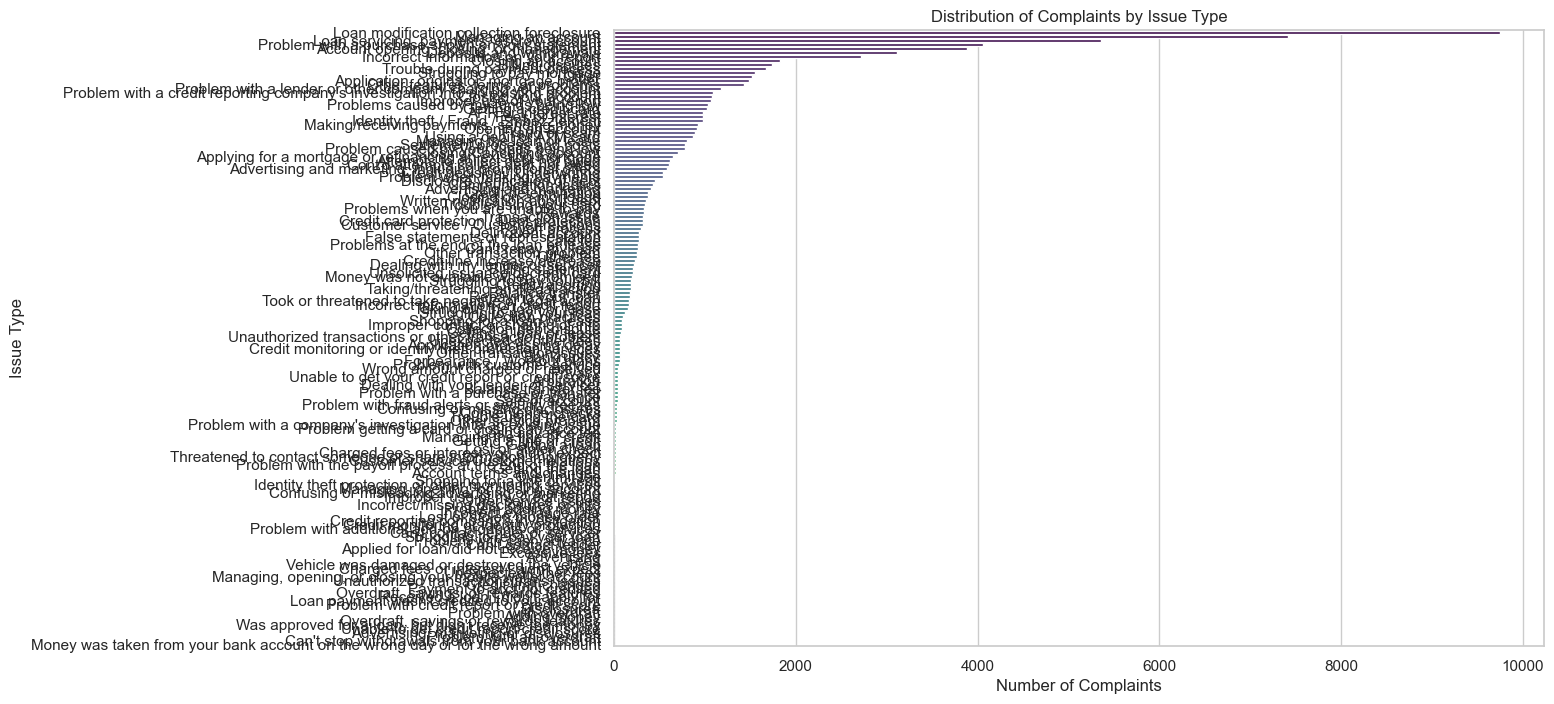

In [8]:
# 2. Distribution of Complaints by Issue Type
plt.figure(figsize=(12, 8))
sns.countplot(y='issue', data=df, order=df['issue'].value_counts().index, palette="viridis")
plt.title("Distribution of Complaints by Issue Type")
plt.xlabel("Number of Complaints")
plt.ylabel("Issue Type")
plt.show()

- This chart illustrates the distribution of consumer complaints by specific issue types, providing a detailed view of common problems encountered in financial services.
- "Loan modification, collection, and foreclosure" is the leading complaint, indicating frequent challenges in loan servicing and management.
- Other significant issues include "problems with a lender or servicer" and "incorrect information on reports," highlighting concerns with accuracy and transparency in financial interactions.
- The diversity of issues, from unauthorized transactions to problems with account management, showcases the various pain points consumers experience, suggesting areas for potential improvement in financial service practices and customer support.

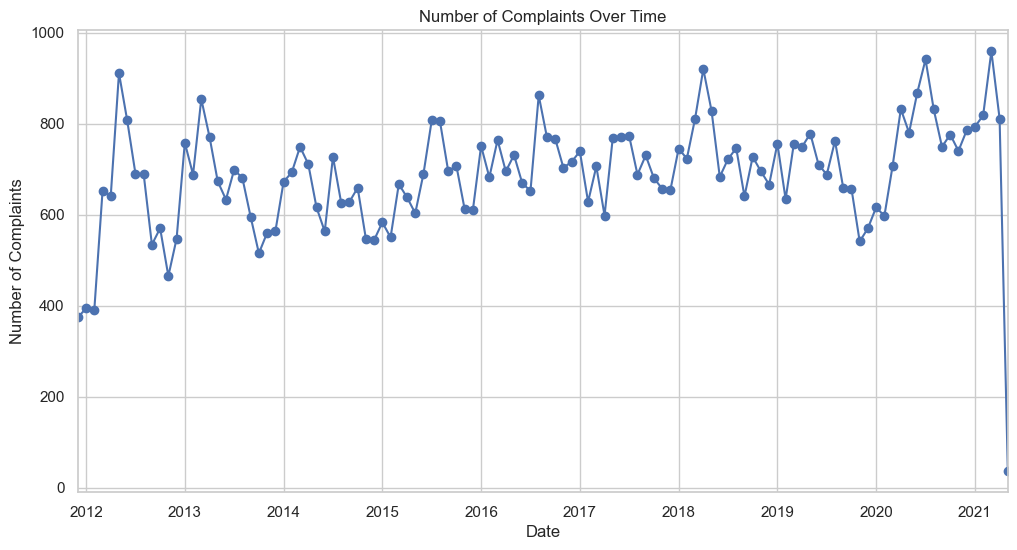

In [9]:
# 3. Complaints Over Time
plt.figure(figsize=(12, 6))
df.set_index('date_received').resample('M').size().plot(marker='o', linestyle='-')
plt.title("Number of Complaints Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Complaints")
plt.show()

- The line chart shows the number of complaints filed over time, from 2012 to 2021.
- There's a noticeable fluctuation in complaints, with peaks around 2012, 2013, and occasional spikes in later years.
- After a period of relative stability, complaints appear to rise again from 2019, peaking in 2020, possibly reflecting increased financial challenges or reporting.
- The sharp drop in 2021 may indicate incomplete data for that year rather than an actual decrease in complaints.
- This trend provides insights into consumer sentiment and potential external factors affecting financial complaints over time.

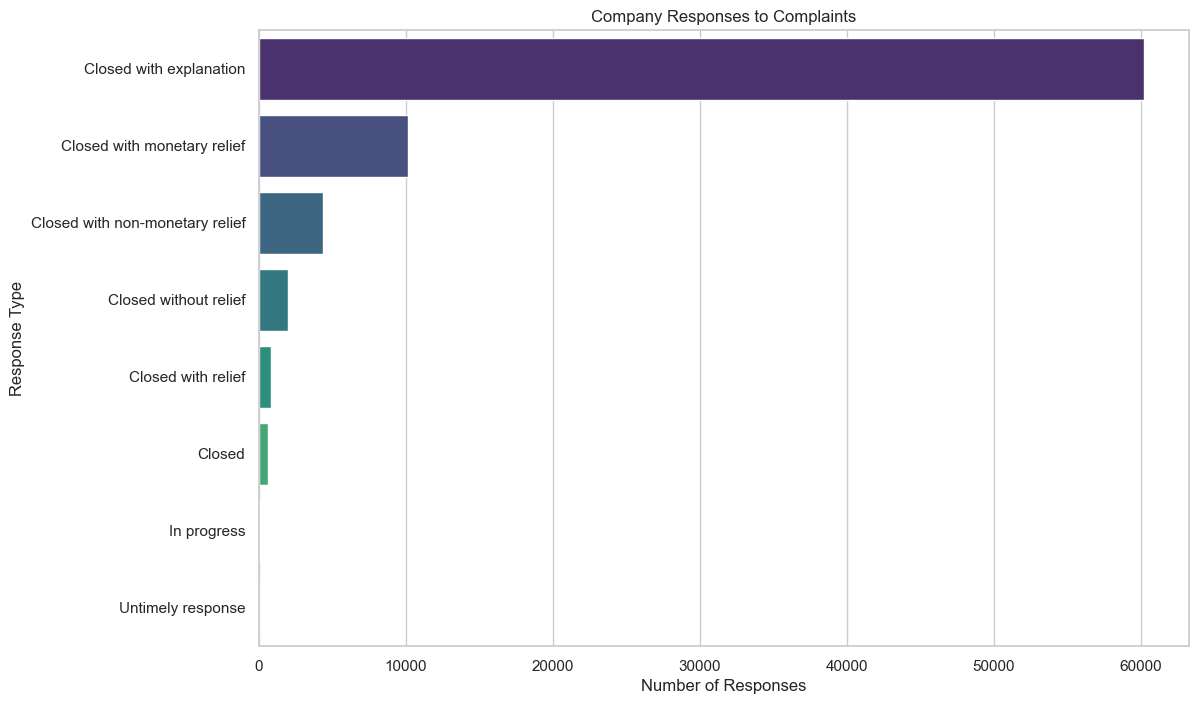

In [10]:
# 4. Company Responses to Complaints
plt.figure(figsize=(12, 8))
sns.countplot(y='company_response', data=df, order=df['company_response'].value_counts().index, palette="viridis")
plt.title("Company Responses to Complaints")
plt.xlabel("Number of Responses")
plt.ylabel("Response Type")
plt.show()


- The chart shows company responses to consumer complaints.
- Most complaints were "Closed with explanation," indicating explanations were the main resolution.
- Some complaints received "monetary" or "non-monetary relief," showing companies provided compensation in certain cases.
- Less common responses include "Closed without relief" and "Closed with relief."
- Few cases are marked "In progress" or "Untimely response," suggesting most complaints were handled on time.

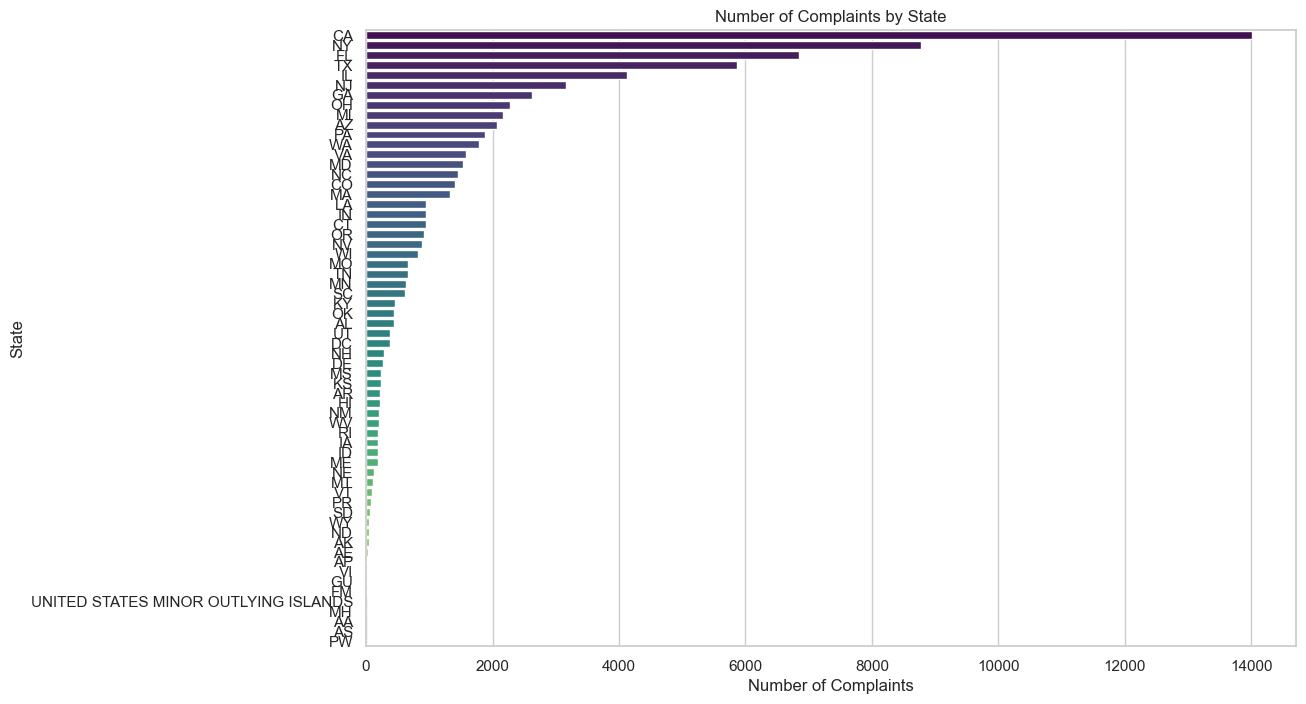

In [11]:
# 5. Number of Complaints by State
plt.figure(figsize=(12, 8))
sns.countplot(y='state', data=df, order=df['state'].value_counts().index, palette="viridis")
plt.title("Number of Complaints by State")
plt.xlabel("Number of Complaints")
plt.ylabel("State")
plt.show()

- The chart shows the number of complaints by state.
- California, Florida, Texas, and New York have the highest complaint counts, indicating high consumer activity or financial concerns in these states.
- Mid-range states include Illinois, Georgia, and Pennsylvania.
- Smaller states and territories have fewer complaints, which may reflect population size or lower reporting rates.

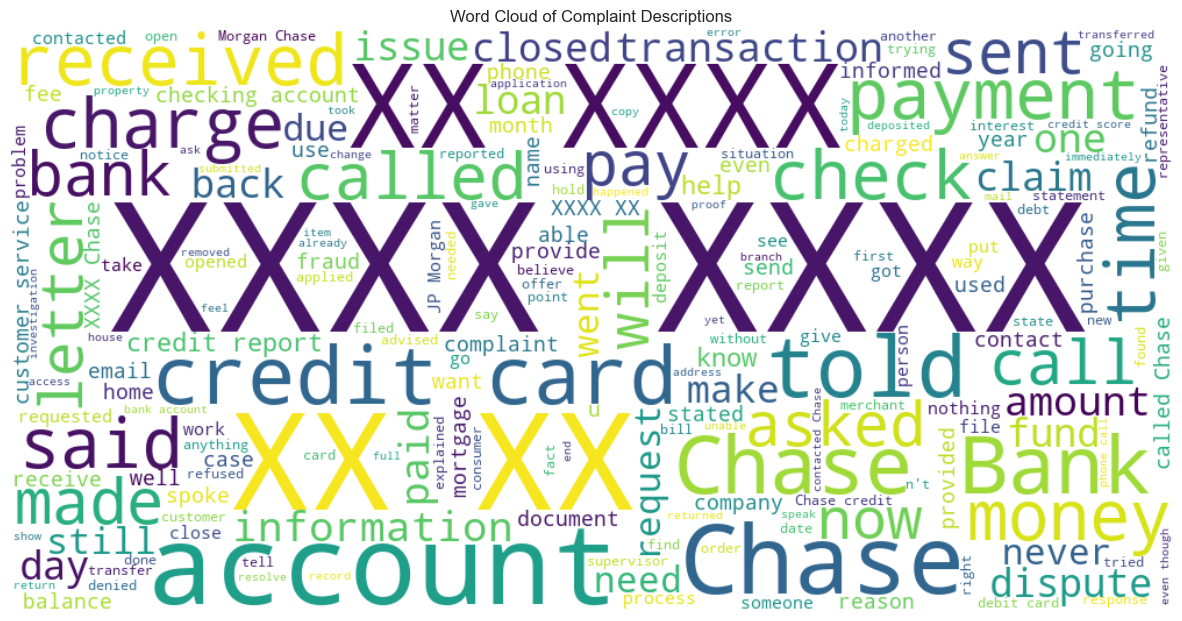

In [12]:
# 6. Word Cloud of Complaint Descriptions
# Combine all complaint descriptions into one string, handling NaN values
text = ' '.join(df['complaint_what_happened'].dropna().values)

# Generate the word cloud
wordcloud = WordCloud(width=1000, height=500, background_color='white', colormap='viridis').generate(text)

# Display the word cloud
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Complaint Descriptions")
plt.show()


Lets rename the necessary columns for easy understanding

In [13]:
df.rename(columns={'product':'category','complaint_what_happened':'complaint_description','sub_product':'sub_category'},inplace=True)
df.head()

,tags,zip_code,complaint_id,issue,date_received,state,consumer_disputed,category,company_response,company,submitted_via,date_sent_to_company,company_public_response,sub_category,timely,complaint_description,sub_issue,consumer_consent_provided
0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13 12:00:00-05:00,CA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,Servicemember,319XX,3229299,Written notification about debt,2019-05-01 12:00:00-05:00,GA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,None,77069,3199379,"Other features, terms, or problems",2019-04-02 12:00:00-05:00,TX,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
3,None,48066,2673060,Trouble during payment process,2017-09-13 12:00:00-05:00,MI,N/A,Mortgage,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,None,10473,3203545,Fees or interest,2019-04-05 12:00:00-05:00,NY,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78313 entries, 0 to 78312
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype                                 
---  ------                     --------------  -----                                 
 0   tags                       10900 non-null  object                                
 1   zip_code                   71556 non-null  object                                
 2   complaint_id               78313 non-null  object                                
 3   issue                      78313 non-null  object                                
 4   date_received              78313 non-null  datetime64[ns, pytz.FixedOffset(-300)]
 5   state                      76322 non-null  object                                
 6   consumer_disputed          78313 non-null  object                                
 7   category                   78313 non-null  object                                
 8   company_response

From the above data, we can see that there are multiple columns like tags, zip code, complaint_id, etc., which are not relevant in categorizing the tickets into predefined categories. we will drop the following columns
-tags
- zip_code
- complaint_id
- date_received
- state
- company_response
- company
- submitted_via
- date_sent_to_company
- company_public_response
- timely
- consumer_consent_provided

In [15]:
df.drop(['tags','zip_code','complaint_id','date_received','state','consumer_disputed','company_response','company','submitted_via','date_sent_to_company','company_public_response','timely','consumer_consent_provided'],1,inplace=True)
df.head()

C:\Users\adity\AppData\Local\Temp\ipykernel_8796\4007287837.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['tags','zip_code','complaint_id','date_received','state','consumer_disputed','company_response','company','submitted_via','date_sent_to_company','company_public_response','timely','consumer_consent_provided'],1,inplace=True)


,issue,category,sub_category,complaint_description,sub_issue
0,Attempts to collect debt not owed,Debt collection,Credit card debt,,Debt is not yours
1,Written notification about debt,Debt collection,Credit card debt,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt
2,"Other features, terms, or problems",Credit card or prepaid card,General-purpose credit card or charge card,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card
3,Trouble during payment process,Mortgage,Conventional home mortgage,,None
4,Fees or interest,Credit card or prepaid card,General-purpose credit card or charge card,,Charged too much interest


In [16]:
#let us look for the Null values and fill them
df.isna().sum()

issue                        0
category                     0
sub_category             10571
complaint_description        0
sub_issue                46297
dtype: int64

In [17]:
#As the words are the main factor while we classify tickits into categories we can not fill missing values with mean or mode.
#we will fill with empty charcter so the processing will happen smothly
df.fillna('',inplace=True)
df.isna().sum()

issue                    0
category                 0
sub_category             0
complaint_description    0
sub_issue                0
dtype: int64

let us see each features one by one

In [18]:
df['issue'][0]

'Attempts to collect debt not owed'

In [19]:
print(df['category'].unique())
print('****Total Unique values in category: ',((df['category'].unique()).size),'****')

['Debt collection' 'Credit card or prepaid card' 'Mortgage'
 'Checking or savings account'
 'Credit reporting, credit repair services, or other personal consumer reports'
 'Vehicle loan or lease'
 'Money transfer, virtual currency, or money service' 'Student loan'
 'Consumer Loan' 'Credit card' 'Bank account or service'
 'Payday loan, title loan, or personal loan' 'Money transfers'
 'Credit reporting' 'Payday loan' 'Prepaid card' 'Other financial service']
****Total Unique values in category:  17 ****


In [20]:
df['sub_category'][0]

'Credit card debt'

In [21]:
df['complaint_description'][2]

'I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX   changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was misled me.'

as we can see in complaint description there is data XXXX which can be problematic and can confuse our ML model so we will try to remove them from the corpus

In [22]:
# Remove patterns like "XXXX XXXX", "XX/XX/2018", and similar text from the 'complaint_description' column
import re

# Define a regex pattern to match "XXXX", "XX/XX/XXXX", "XX/XX/2018", etc.
pattern = r'\bXXXX\b|\bXX/\d{2}/\d{4}\b|\bXX/\d{2}/\d{4}\b|\bXX/XX/\d{4}\b|\bXX/XX/\d{2}\b|\bXX/XX/XXXX\b|\bXX/\d{2}\b|\bXX\b'

# Apply the pattern to the 'complaint_description' column
df['complaint_description'] = df['complaint_description'].str.replace(pattern, '', regex=True)

# Display the first few rows of the modified column to verify changes
df[['complaint_description']].head()


,complaint_description
0,
1,Good morning my name is and I appreciate it ...
2,I upgraded my card in and was told by the a...
3,
4,


In [23]:
df['complaint_description'][2]

'I upgraded my   card in  and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account.    changed my anniversary date from  to  without my consent!  has the recording of the agent who was misled me.'

In [24]:
df['complaint_description'][10]

'Chase Card was reported on . However, fraudulent application have been submitted my identity without my consent to fraudulently obtain services. Do not extend credit without verifying the identity of the applicant.'

In [25]:
df['sub_issue'][2]

'Problem with rewards from credit card'

In [26]:
#combine the all info into single tags columns for processing and creting a classification model
df['tags']=df['issue']+df['sub_category']+df['sub_issue']+df['complaint_description']

In [27]:
#Finally save the cleaned dataset
df.to_csv('Inquiry_Classification_text_dataset.csv')

# NLP part starts from here

In [28]:
#function For preprocessing
def pre_process(text) :
    #tokenize the text received
    tokens = word_tokenize(text)
    #Remove Stopwords
    stop_words=set(stopwords.words('english'))
    filtered_tokens=[] #list which stores the tokens after the stop word removal
    for word in tokens:
        if word.lower() not in stop_words and word not in string.punctuation :
            filtered_tokens.append(word)
    #stemming of the word tokens using PorterStemmer()
    stemmer=PorterStemmer()
    stemmed_tokens=[] #list which stores the word tokens after the stemming process
    for word in filtered_tokens:
        stemmed_tokens.append(stemmer.stem(word))
    #finaly return the stemmed token as a single text or sentence  
    return ((' '.join(stemmed_tokens)).lower())

In [29]:
df['tags']=df['tags'].apply(pre_process)
df['tags'][2]

'featur term problemsgeneral-purpos credit card charg cardproblem reward credit cardi upgrad card told agent upgrad anniversari date would chang turn agent give wrong inform order upgrad account chang anniversari date without consent record agent misl'

In [30]:
#import text vectorizor
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english') #vector instance
tfidf_matrix = tfidf_vectorizer.fit_transform(df['tags']) #fit the data into vector

# Train test split 

In [31]:
from sklearn.model_selection import train_test_split
X = tfidf_matrix  # Combined text feature
y = df['category']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<b>Let us compare diffrent models to find the best suitable model</b>

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, ComplementNB, MultinomialNB, CategoricalNB
from sklearn.svm import SVC

# Metrics
from sklearn.metrics import recall_score, precision_score, f1_score, classification_report, confusion_matrix

In [40]:
models = {
    'LogisticRegression': LogisticRegression(),
    'DecisionTree': DecisionTreeClassifier(criterion = 'log_loss', max_depth = None),
    'RandomForestClassifier': RandomForestClassifier(n_estimators = 40, criterion = 'entropy', max_depth = None)
}

In [41]:
# metrics
metrics = {
    'train_score': [],
    'test_score': [],
    'precision_score': [],
    'recall_score': [],
    'f1_score': [],
}

In [42]:
X_train_subset = X_train[:1000]  # Use only the first 1000 samples
y_train_subset = y_train[:1000]
X_test_subset = X_test[:300]
y_test_subset = y_test[:300]


In [43]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")
for i in models:
    models[i].fit(X_train, y_train)
    
    train_score = models[i].score(X_train_subset, y_train_subset)
    test_score = models[i].score(X_test_subset, y_test_subset)
    metrics['train_score'].append(train_score)
    metrics['test_score'].append(test_score)
    
    y_pred = models[i].predict(X_test_subset)
    metrics['precision_score'].append(precision_score(y_test_subset, y_pred, average = 'weighted'))
    metrics['recall_score'].append(recall_score(y_test_subset, y_pred, average = 'weighted'))
    metrics['f1_score'].append(f1_score(y_test_subset, y_pred, average = 'weighted'))
    
    print(train_score, test_score)

C:\Users\adity\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adity\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.982 0.9466666666666667
1.0 0.97
1.0 0.96


C:\Users\adity\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
results = pd.DataFrame(metrics, index = list(models.keys()), columns = list(metrics.keys()))
results.rename(columns = {'test_score': 'Accuracy'}, inplace = True)
results.sort_values(by = 'Accuracy', ascending = False).style.background_gradient('Blues')

,train_score,Accuracy,precision_score,recall_score,f1_score
DecisionTree,1.000000,0.970000,0.973874,0.970000,0.970016
RandomForestClassifier,1.000000,0.960000,0.953333,0.960000,0.954963
LogisticRegression,0.982000,0.946667,0.933335,0.946667,0.938600


Let us go ahed with Random Forest model

In [48]:
model=RandomForestClassifier(n_estimators = 40, criterion = 'entropy', max_depth = None)
model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=40)

In [49]:
import joblib
joblib.dump(model, 'model.joblib')


['model.joblib']

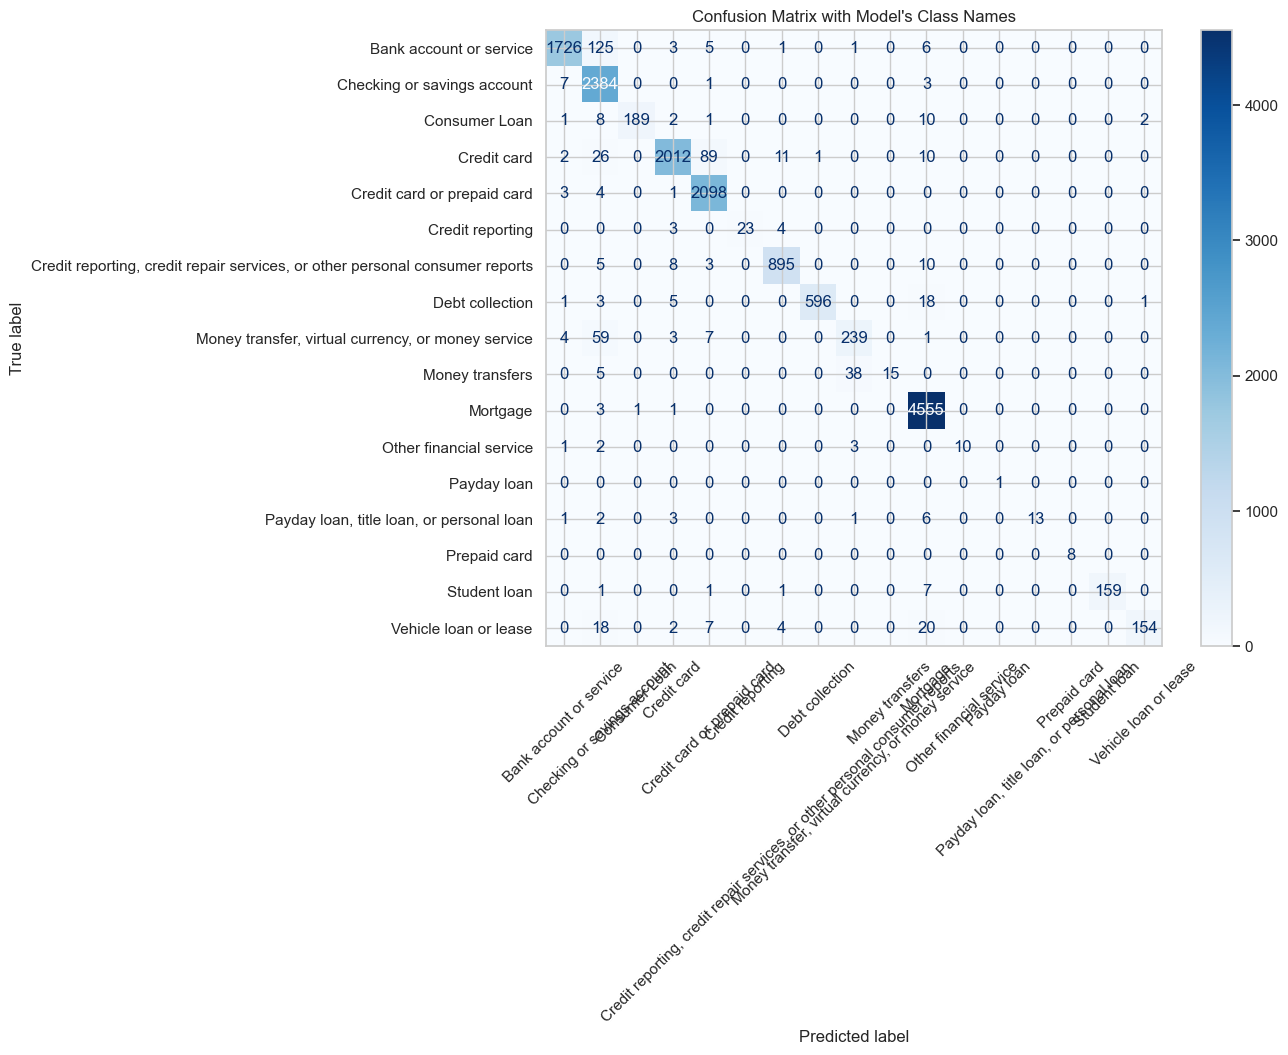

In [58]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Get the class names directly from the trained model
class_names = model.classes_

# Get the predicted labels
y_pred = model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Set the figure size and create an axis to pass to ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the size as needed

# Display the confusion matrix with class names on the specified axis
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues', ax=ax)  # Pass `ax` to plot on the resized figure

# Rotate x-axis labels
plt.xticks(rotation=45)  # Rotate labels by 45 degrees, adjust angle as needed

plt.title("Confusion Matrix with Model's Class Names")
plt.show()


In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Predict labels for the test set
y_pred = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print individual metrics
print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Print full classification report for more details
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=model.classes_))


Model Evaluation Metrics:
Accuracy: 0.96
Precision: 0.96
Recall: 0.96
F1 Score: 0.96

Detailed Classification Report:
                                                                              precision    recall  f1-score   support

                                                     Bank account or service       0.99      0.92      0.96      1867
                                                 Checking or savings account       0.90      1.00      0.95      2395
                                                               Consumer Loan       0.99      0.89      0.94       213
                                                                 Credit card       0.98      0.94      0.96      2151
                                                 Credit card or prepaid card       0.95      1.00      0.97      2106
                                                            Credit reporting       1.00      0.77      0.87        30
Credit reporting, credit repair services, or other pers

# New Input Pipeline

In [62]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer  # Or use CountVectorizer
from sklearn.linear_model import LogisticRegression  # Example model
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
import nltk
# Download NLTK data (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [63]:

# Step 1: Create a custom transformer for preprocessing
class TextPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.stop_words = set(stopwords.words('english'))
        self.stemmer = PorterStemmer()
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return [self.pre_process(text) for text in X]
    
    def pre_process(self, text):
        # Tokenize
        tokens = word_tokenize(text)
        
        # Remove stop words and punctuation
        filtered_tokens = [word for word in tokens if word.lower() not in self.stop_words and word not in string.punctuation]
        
        # Stemming
        stemmed_tokens = [self.stemmer.stem(word) for word in filtered_tokens]
        
        # Return processed text
        return ' '.join(stemmed_tokens).lower()

# Step 2: Define the pipeline
pipeline = Pipeline([
    ('preprocessor', TextPreprocessor()),
    ('vectorizer', tfidf_vectorizer),  
    ('classifier', model)  
])



# Step 4: Make predictions on new input data
# Sample new inputs
new_inputs = ["i want asistence for debt"]
predictions = pipeline.predict(new_inputs)

# Display predictions
print(predictions)


['Credit card']


In [65]:
import joblib

# Save the vectorizer
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.joblib')



['tfidf_vectorizer.joblib']

In [66]:
joblib.dump(pipeline, 'pipeline.joblib')


['pipeline.joblib']

In [67]:
import json

# Example of parameters to save
config = {
    "vectorizer": {
        "ngram_range": (1, 2),
        "max_features": 10000
    },
    "model": {
        "C": 1.0,
        "kernel": "linear"
    }
}

# Save the configuration as JSON
with open('config.json', 'w') as f:
    json.dump(config, f)


In [68]:
class_names = model.classes_
joblib.dump(class_names, 'class_names.joblib')


['class_names.joblib']